<a href="https://colab.research.google.com/github/hwan95/HonegongML/blob/main/CH3_Regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#다중회귀 multiple regression

: 여러 개의 특성을 사용한 선형회귀

특성 공학 feature engineering
: 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업

##데이터 준비

In [ ]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state = 42
)

## 변환기 transformer : 특성을 만들거나 전처리

**from sklearn.preprocessing import PolynomialFeatures**


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


poly.transform([[a,b]])
=[[1,a,b,a**2,b**2,ab]]

1은 y 절편 // 선형 모델은 자동으로 절편을 추가하니 필요없다
이런경우 include_bias = False 지정


In [ ]:
poly = PolynomialFeatures(include_bias =False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias= False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


get_featrue_names() : 특성의 조합 확인

In [ ]:
poly.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [ ]:
test_poly = poly.transform(test_input)

## 모델 훈련하기

In [ ]:
# 모델 훈련
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
# 훈련 세트 점수
print(lr.score(train_poly,train_target))

0.9903183436982124


In [ ]:
# 테스트 세트 점수
print(lr.score(test_poly,test_target))

0.9714559911594134


n 제곱항 특성까지 degree= n(default =2)

In [ ]:
# 5제곱 까지 특성 만들기
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [ ]:
# 모델 학습
lr.fit(train_poly,train_target)
#훈련 세트 점수
print(lr.score(train_poly, train_target))

0.9999999999991097


In [ ]:
#테스트 세트 점수 => 과대 적합
print(lr.score(test_poly,test_target))

-144.40579242684848


과대 적합 원인 : 샘플 개수 보다 많은 특성 개수

샘플 개수 : 42   <<   특성 개수 :55


## 규제 regularization 
- 과대 적합 방지목적
- 훈련세트를 너무 과도하게 학습하지 못하게도록 방해 (특성의 개수를 유지하는 경우)

-선형 모델의 경우 : 특성에 곱해지는 계수를 작게 만든다 . 즉, 특성의 영향력을 줄인다



### 표준화하기( standardziation)
- 규제를 적용하기 위해선 표준화 필요
- StandardScaler 클래스 사용( sklearn) : 표준점수 변환기

from sklearn.preprocessing import StandardScaler

- PolynomailFeatures클래스로 만든 세트로 훈련 후 변환

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 릿지 회귀 : 계수의 제곱을 기준으로 규제

**from sklearn.linear_model import Ridge**

**릿지 ridge 와 라쏘 lasso**

릿지 : 계수를 제곱한 기준으로 규제 

라쏘 : 계수의 절댓값을 기준으로 규제

In [ ]:
from sklearn.linear_model import Ridge
#릿지 학습
ridge = Ridge()
ridge.fit(train_scaled, train_target)
#훈련세트 점수
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [ ]:
#테스트 세트 점수
print(ridge.score(test_scaled, test_target))

0.9790693977615391


**매개 변수 alpha 로 규제 강도 조절**

규제 강도는 알파 값에 비례

alpha는 직접 지정해야 줘야하는 hyperparameter

In [ ]:
# 알파값 찾기

import matplotlib.pyplot as plt

train_score = []
test_score=[]

# 알파값을 0.001에서 100까지 10배 씩 늘림
alpha_list  =[ 0.001, 0.01, 0.1, 1,10,100]
# 각각의 훈련 점수와 테스트 점수 확인

for alpha in alpha_list :
  #모델 생성 및 학습
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled, train_target)

  # 훈련점수, 테스트점수 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))


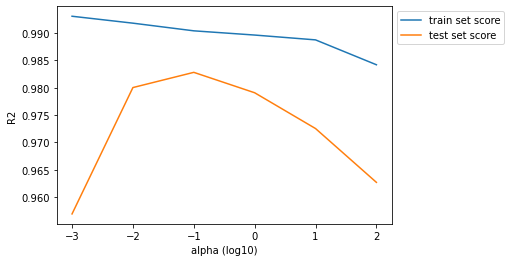

In [ ]:
#그래프 확인
plt.plot(np.log10(alpha_list), train_score, label ='train set score' )
plt.plot(np.log10(alpha_list), test_score, label = 'test set score' )
plt.xlabel('alpha (log10)')
plt.ylabel('R2')
# bbox_to_anchor : 그래프 밖이나 좀더 정확한 위치에 라벨 표시
plt.legend(bbox_to_anchor=(1,1))
plt.show()

훈련세트와 테스트 점수가 가장 가깝고 점수가 높은 경우는 alpha= 0.1

In [ ]:
# alpha =0.1 모델
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled,test_target))

0.9903815817570365
0.9827976465386884


### 라쏘 회귀 : 특성 계수의 절댓값 기준

유용한 특성을 골라내는 용도로 사용가능
```
from sklearn.linear_model import Lasso
```
규제 강도에 따라 계수값을 0으로 만드는 경우도 있다


In [ ]:
# 모델 생성 및 학습
from sklearn.linear_model import Lasso

lasso  = Lasso()
lasso.fit(train_scaled, train_target)
# 훈련 점수 확인
print(lasso.score(train_scaled,train_target))

0.989789897208096


In [ ]:
# 테스트 점수 확인
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [ ]:
#최적의 alpha값 찾기

train_score =[]
test_score = []
alpha_list = [0.001,0.01,0.1,1,10,100]

for alpha in alpha_list:
  #모델 생성 및 학습
  lasso = Lasso(alpha=alpha, max_iter = 10000)
  lasso.fit(train_scaled, train_target)

  #훈련점수와 테스트 점수 저장
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


max_iter : 라쏘 모델이 학습할때 필요한 반복계산 횟수 지정

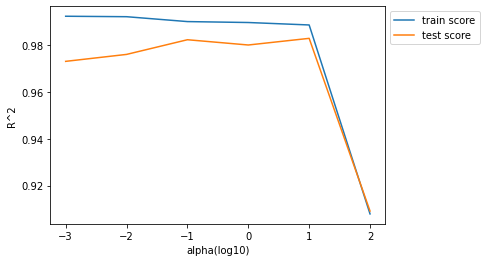

In [ ]:
#그래프 그리기
plt.plot(np.log10(alpha_list), train_score, label='train score')
plt.plot(np.log10(alpha_list), test_score, label='test score')
plt.xlabel('alpha(log10)')
plt.ylabel('R^2')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

alpha= 10이 최적의 값

In [ ]:
#alpha = 10
lasso = Lasso(alpha= 10)
lasso.fit(train_scaled, train_target)
#점수확인
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
print(np.sum(lasso.coef_ ==0))

40


55개 특성중 40개의 특성의 coefficient 값이 0
즉, 라쏘모델이 사용한 특성은 15개이다.